<a href="https://colab.research.google.com/github/Saudul-12/LogisticRegression/blob/main/LR_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Build a logistic regression model and select the best model using Python.**


**y -> Whether the client has subscribed a term deposit or not ?**

In [11]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 

In [12]:
test = pd.read_csv('bank-full.csv', sep = ';')
test.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
categorical = [var for var in test.columns if test[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('categorical variables are:', categorical)

There are 10 categorical variables

categorical variables are: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [14]:
test['job'] = test.job.factorize()[0]
test['marital'] = test.marital.factorize()[0]
test['education'] = test.education.factorize()[0]
test['default'] = test.default.factorize()[0]
test['housing'] = test.housing.factorize()[0]
test['loan'] = test.loan.factorize()[0]
test['contact'] = test.contact.factorize()[0]
test['month'] = test.month.factorize()[0]
test['poutcome'] = test.poutcome.factorize()[0]
test['y'] = test.y.factorize()[0]

In [15]:
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,0,0,0,5,0,261,1,-1,0,0,0
1,44,1,1,1,0,29,0,0,0,5,0,151,1,-1,0,0,0
2,33,2,0,1,0,2,0,1,0,5,0,76,1,-1,0,0,0
3,47,3,0,2,0,1506,0,0,0,5,0,92,1,-1,0,0,0
4,33,4,1,2,0,1,1,0,0,5,0,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,17,5,977,3,-1,0,0,1
45207,71,5,2,3,0,1729,1,0,1,17,5,456,2,-1,0,0,1
45208,72,5,0,1,0,5715,1,0,1,17,5,1127,5,184,3,3,1
45209,57,3,0,1,0,668,1,0,2,17,5,508,4,-1,0,0,0


In [16]:
test[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']] = test[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']].apply(lambda x: pd.factorize(x)[0])

In [17]:
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,0,0,0,5,0,261,1,-1,0,0,0
1,44,1,1,1,0,29,0,0,0,5,0,151,1,-1,0,0,0
2,33,2,0,1,0,2,0,1,0,5,0,76,1,-1,0,0,0
3,47,3,0,2,0,1506,0,0,0,5,0,92,1,-1,0,0,0
4,33,4,1,2,0,1,1,0,0,5,0,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,17,5,977,3,-1,0,0,1
45207,71,5,2,3,0,1729,1,0,1,17,5,456,2,-1,0,0,1
45208,72,5,0,1,0,5715,1,0,1,17,5,1127,5,184,3,3,1
45209,57,3,0,1,0,668,1,0,2,17,5,508,4,-1,0,0,0


In [18]:
test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [19]:
test.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,3.526133,0.513238,1.049944,0.018027,1362.272058,0.444162,0.160226,0.776293,15.806419,2.940722,258.163080,2.763841,40.197828,0.580323,0.290062,0.116985
std,10.618762,3.098343,0.692948,0.968986,0.133049,3044.765829,0.496878,0.366820,0.549747,8.322476,3.179741,257.527812,3.098021,100.128746,2.303441,0.698469,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,3.000000,0.000000,1.000000,0.000000,448.000000,0.000000,0.000000,1.000000,16.000000,2.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,48.000000,6.000000,1.000000,1.000000,0.000000,1428.000000,1.000000,0.000000,1.000000,21.000000,5.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
test.shape

(45211, 17)

In [22]:
# I have taken only the necessary columns as independent variables in the model.
X = test.iloc[:,[1,5,7,13,15]]
Y = test.iloc[:,16]
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [23]:
classifier.coef_

array([[ 1.92669722e-02,  3.06958638e-05, -5.73331024e-01,
        -2.51059366e-03,  9.62112667e-01]])

In [24]:
classifier.predict_proba(X)

array([[0.90793639, 0.09206361],
       [0.9116797 , 0.0883203 ],
       [0.94731054, 0.05268946],
       ...,
       [0.41601255, 0.58398745],
       [0.90688413, 0.09311587],
       [0.68460611, 0.31539389]])

In [25]:
y_pred = classifier.predict(X)
test['y_pred'] = y_pred
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred
0,58,0,0,0,0,2143,0,0,0,5,0,261,1,-1,0,0,0,0
1,44,1,1,1,0,29,0,0,0,5,0,151,1,-1,0,0,0,0
2,33,2,0,1,0,2,0,1,0,5,0,76,1,-1,0,0,0,0
3,47,3,0,2,0,1506,0,0,0,5,0,92,1,-1,0,0,0,0
4,33,4,1,2,0,1,1,0,0,5,0,198,1,-1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,17,5,977,3,-1,0,0,1,0
45207,71,5,2,3,0,1729,1,0,1,17,5,456,2,-1,0,0,1,0
45208,72,5,0,1,0,5715,1,0,1,17,5,1127,5,184,3,3,1,1
45209,57,3,0,1,0,668,1,0,2,17,5,508,4,-1,0,0,0,0


In [26]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([test,y_prob],axis=1)
new_df  

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred,0,1
0,58,0,0,0,0,2143,0,0,0,5,0,261,1,-1,0,0,0,0,0.907936,0.092064
1,44,1,1,1,0,29,0,0,0,5,0,151,1,-1,0,0,0,0,0.911680,0.088320
2,33,2,0,1,0,2,0,1,0,5,0,76,1,-1,0,0,0,0,0.947311,0.052689
3,47,3,0,2,0,1506,0,0,0,5,0,92,1,-1,0,0,0,0,0.904689,0.095311
4,33,4,1,2,0,1,1,0,0,5,0,198,1,-1,0,0,0,0,0.906986,0.093014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,17,5,977,3,-1,0,0,1,0,0.909692,0.090308
45207,71,5,2,3,0,1729,1,0,1,17,5,456,2,-1,0,0,1,0,0.900704,0.099296
45208,72,5,0,1,0,5715,1,0,1,17,5,1127,5,184,3,3,1,1,0.416013,0.583987
45209,57,3,0,1,0,668,1,0,2,17,5,508,4,-1,0,0,0,0,0.906884,0.093116


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix) 

[[39503   419]
 [ 4452   837]]


In [28]:
accuracy = sum(Y==y_pred)/test.shape[0]
accuracy

0.8922607330074539

In [29]:
from sklearn.metrics import classification_report 
print (classification_report (Y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39922
           1       0.67      0.16      0.26      5289

    accuracy                           0.89     45211
   macro avg       0.78      0.57      0.60     45211
weighted avg       0.87      0.89      0.86     45211



In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score  

0.5738787558598029

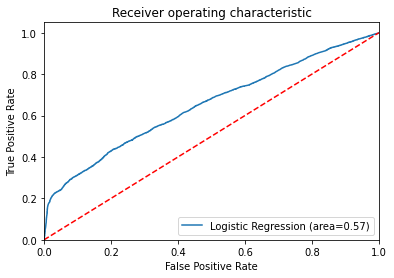

In [31]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 

In [32]:
tpr

array([0.00000000e+00, 1.89071658e-04, 1.13442995e-03, ...,
       9.99810928e-01, 1.00000000e+00, 1.00000000e+00])

In [33]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99984971, 0.99984971,
       1.        ])